<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/OmerAndKevin/Kevin_Omer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Data

In [1]:
# Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")
data_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,1,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,0,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,5754.33


# KMeans

## Finding Optimal K

Obvious, as we have only 2 categories, but here is the code if you want to take a look

In [3]:
# Fitting K-means on certain values
# Storing sum of sqaured distance of samples to centroids in distance
distance = []
values = range(1,10)
for k in values:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data_df)
    distance.append(k_means.inertia_)

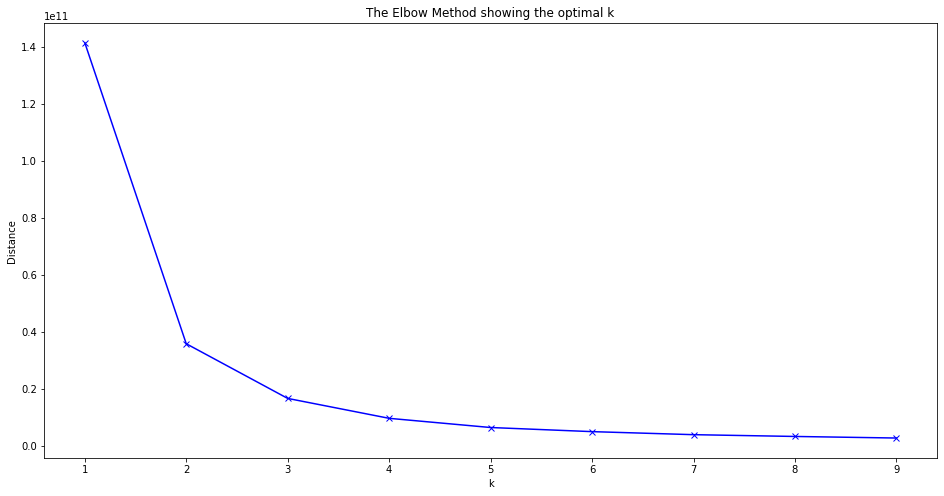

In [4]:
# Plotting Elbow Plot
plt.figure(figsize=(16,8))
plt.plot(values, distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Fitting 2-Means Model

In [5]:
k_means = KMeans(n_clusters=2)
k_means.fit(data_df)

KMeans(n_clusters=2)

**KMeans.inertia_** tells us the sum of the squared distance of samples to cluster centers, want to  **minimize** this number

In [6]:
k_means.inertia_

35885740721.52976

In [7]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
k_means.feature_names_in_

array(['age', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'employee_number', 'environment_satisfaction', 'gender',
       'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years',
       'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_with_curr_manager', 'attrition', 'rate_avg'], dtype=object)

## Improving Model

We only want to include features that maximizes our accuracies from our Sequential Forward/Backward Wrappers, so we drop the columns that don't help us

In [9]:
trimmed_data_df = data_df.drop(['daily_rate', 'department', 'education_field', 'gender',
       'hourly_rate', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike',
       'total_working_years', 'years_at_company', 'years_with_curr_manager',
       'attrition'], axis=1)
trimmed_data_df.head()

,age,business_travel,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,rate_avg
0,41,2,1,2,1,2,3,2,7,4,2,1,3,1,0,0,1,4,6891.67
1,49,1,8,1,2,3,2,2,6,2,1,0,4,4,1,3,3,7,8415.67
2,37,2,2,2,4,4,2,1,2,3,2,1,3,2,0,3,3,0,1287.00
3,33,1,3,4,5,4,3,1,6,3,1,1,3,3,0,3,3,7,8202.33
4,27,2,2,1,7,1,3,1,2,2,1,0,3,4,1,3,3,2,5754.33


In [10]:
k_means_trimmed_features = KMeans(n_clusters=2)
k_means_trimmed_features.fit(trimmed_data_df)
k_means_trimmed_features.inertia_

4222577263.8277016

In [11]:
k_means.inertia_/k_means_trimmed_features.inertia_

8.498539749394636

The distance of the sum of the squared distance of samples to cluster centers is about 8.5 times less than the K-means done on all the features, which means that we are doing much better than before

## Comparing Predictions

In [12]:
kmean_pred = np.array(k_means_trimmed_features.predict(trimmed_data_df))
temp = np.unique(kmean_pred, return_counts=True)[1]
print("KMeans predicted {} non-attrition and {} attrition".format(temp[0], temp[1]))
print("Dataset contains {} non-attrition and {} attrition".format(data_df["attrition"].value_counts()[0], data_df["attrition"].value_counts()[1]))

KMeans predicted 1193 non-attrition and 1273 attrition
Dataset contains 1233 non-attrition and 1233 attrition


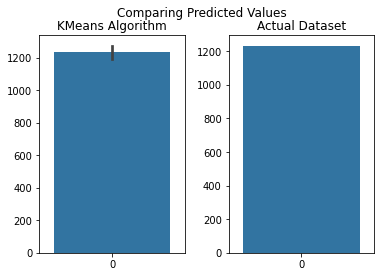

In [13]:
fig, axs = plt.subplots(1,2)
sns.barplot(data=pd.DataFrame(kmean_pred).value_counts(), ax=axs[0])
sns.barplot(data=pd.DataFrame(data_df['attrition']).value_counts(), ax=axs[1])
fig.suptitle("Comparing Predicted Values")
axs[0].set_title("KMeans Algorithm")
axs[1].set_title("Actual Dataset")
axs[1].set_xticklabels(axs[1].get_xticks(), rotation=0)
plt.subplots_adjust(wspace=0.3)
plt.show() 

# PCA Overview

In [14]:
# Standard Scalar
temp_df = data_df.drop(["attrition"], axis=1)
X_scale = StandardScaler().fit_transform(temp_df)

# PCA Instance
pca = PCA(n_components=19, random_state=42)
components = pca.fit_transform(X_scale)

In [15]:
# 30 features now reduced to 19
X_scale.shape

(2466, 30)

In [16]:
pca.explained_variance_

array([4.04998457, 2.06953426, 1.8077928 , 1.74394657, 1.65422059,
       1.42068108, 1.38101276, 1.1839122 , 1.13585587, 1.05478572,
       1.05099293, 0.98104648, 0.95852567, 0.94391293, 0.9282566 ,
       0.90975676, 0.85003758, 0.83046955, 0.81709054])

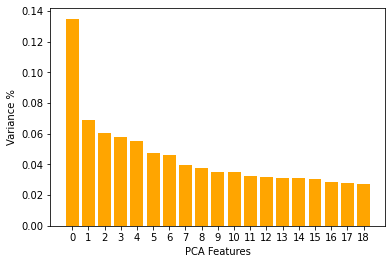

In [17]:
# Visualizing Top Predictors
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PCA Features')
plt.ylabel('Variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(components)

In [18]:
kmeans = KMeans(2, random_state=42)
labels = kmeans.fit_predict(PCA_components)
print(labels)

[1 0 1 ... 1 1 1]


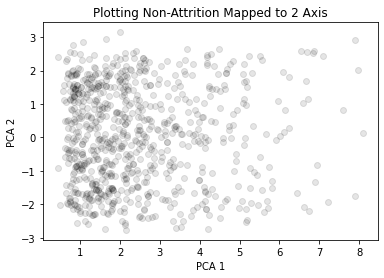

In [19]:
plt.scatter(PCA_components[labels==0][0], PCA_components[labels==0][1], alpha=.1, color='black')
plt.title("Plotting Non-Attrition Mapped to 2 Axis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

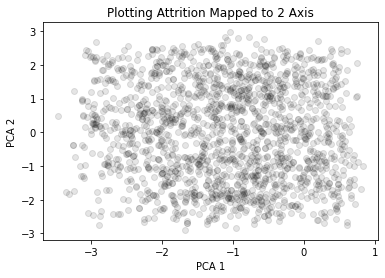

In [20]:
plt.scatter(PCA_components[labels==1][0], PCA_components[labels==1][1], alpha=.1, color='black')
plt.title("Plotting Attrition Mapped to 2 Axis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

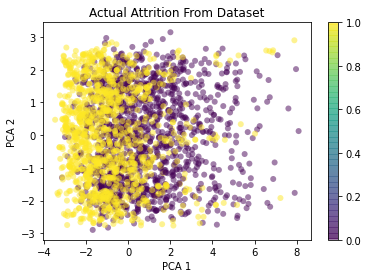

In [21]:
plt.scatter(PCA_components[0], PCA_components[1],
            c=data_df["attrition"], edgecolor='none', alpha=0.5,
            )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Actual Attrition From Dataset")
plt.colorbar();

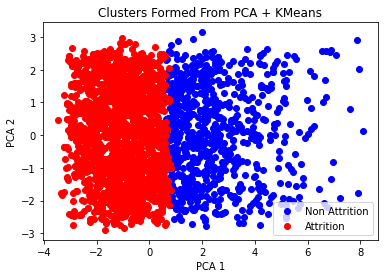

In [22]:
filtered_no_attrition = PCA_components[labels==0] 
filtered_attrition = PCA_components[labels==1]
plt.scatter(filtered_no_attrition[0], filtered_no_attrition[1], color="blue", label="Non Attrition")
plt.scatter(filtered_attrition[0], filtered_attrition[1], color="red", label="Attrition")
plt.title("Clusters Formed From PCA + KMeans")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [23]:
kmean_pred = labels
temp = np.unique(kmean_pred, return_counts=True)[1]
print("KMeans predicted {} non-attrition and {} attrition".format(temp[0], temp[1]))
print("Dataset contains {} non-attrition and {} attrition".format(data_df["attrition"].value_counts()[0], data_df["attrition"].value_counts()[1]))

KMeans predicted 782 non-attrition and 1684 attrition
Dataset contains 1233 non-attrition and 1233 attrition


**KMeans** had *simple* clusters but missclassified **~450 points with PCA**

#Other Clustering Techniques

In [24]:
from sklearn import metrics
from sklearn.cluster import SpectralClustering
for i in range(2, 10):
  sc = SpectralClustering(n_clusters=i, eigen_solver="arpack", affinity="nearest_neighbors").fit_predict(trimmed_data_df)
  print(i, metrics.calinski_harabasz_score(trimmed_data_df, sc))

2 6075.341738795247
3 5673.546663081706
4 6003.491868533518
5 5791.098462417324
6 5206.528912605491
7 4858.302716238468
8 4600.78852720365
9 4529.9174666753015


In [25]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering().fit_predict(trimmed_data_df)
#hierarchical clustering

In [26]:
from sklearn.cluster import MeanShift
mshift = MeanShift(bandwidth=2).fit_predict(trimmed_data_df)

In [27]:
sc = SpectralClustering(n_clusters=2, affinity="nearest_neighbors").fit_predict(trimmed_data_df)
#fit_predict for unsupervised models
print("kmeans:", metrics.calinski_harabasz_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.calinski_harabasz_score(trimmed_data_df, sc))
print("mean shift:", metrics.calinski_harabasz_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.calinski_harabasz_score(trimmed_data_df, agglomerative))
#https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c
#higher is better
#how well-defined each cluster is

kmeans: 0.3497630503932402
spectral clustering: 6075.341738795247
mean shift: 7713573.418970081
agglomerative clustering: 4273.89823293521


In [28]:
print("kmeans:", metrics.davies_bouldin_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.davies_bouldin_score(trimmed_data_df, sc))
print("mean shift:", metrics.davies_bouldin_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.davies_bouldin_score(trimmed_data_df, agglomerative))
#relates distance between clusters and cluster size
#higher is better

kmeans: 69.99652228394483
spectral clustering: 0.5780225586652061
mean shift: 0.0023708923947202217
agglomerative clustering: 0.5800646696125515


In [29]:
print("kmeans:", metrics.silhouette_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.silhouette_score(trimmed_data_df, sc))
print("mean shift:", metrics.silhouette_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.silhouette_score(trimmed_data_df, agglomerative))
#higher is better

kmeans: 0.0021784550292745872
spectral clustering: 0.5765433292685305
mean shift: 0.006675512142006115
agglomerative clustering: 0.5205695764024323


#K Prototype Clustering

In [32]:
!pip install KModes

In [34]:
from kmodes.kprototypes import KPrototypes
data_arr = trimmed_data_df.values

In [35]:
trimmed_data_df

,age,business_travel,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,rate_avg
0,41,2,1,2,1,2,3,2,7,4,2,1,3,1,0,0,1,4,6891.67
1,49,1,8,1,2,3,2,2,6,2,1,0,4,4,1,3,3,7,8415.67
2,37,2,2,2,4,4,2,1,2,3,2,1,3,2,0,3,3,0,1287.00
3,33,1,3,4,5,4,3,1,6,3,1,1,3,3,0,3,3,7,8202.33
4,27,2,2,1,7,1,3,1,2,2,1,0,3,4,1,3,3,2,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,39,2,7,2,1160,1,1,1,0,1,1,0,3,1,0,2,2,0,5209.67
2462,32,0,11,2,998,3,2,1,4,1,1,1,4,2,0,0,2,2,3571.67
2463,34,2,7,3,1729,3,2,2,4,1,1,0,3,2,0,4,1,4,1882.00
2464,36,2,18,3,1080,1,2,1,5,2,1,1,3,2,0,1,2,3,3976.33


In [36]:
data_arr

array([[4.10000e+01, 2.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 6.89167e+03],
       [4.90000e+01, 1.00000e+00, 8.00000e+00, ..., 3.00000e+00,
        7.00000e+00, 8.41567e+03],
       [3.70000e+01, 2.00000e+00, 2.00000e+00, ..., 3.00000e+00,
        0.00000e+00, 1.28700e+03],
       ...,
       [3.40000e+01, 2.00000e+00, 7.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 1.88200e+03],
       [3.60000e+01, 2.00000e+00, 1.80000e+01, ..., 2.00000e+00,
        3.00000e+00, 3.97633e+03],
       [3.20000e+01, 2.00000e+00, 1.50000e+01, ..., 2.00000e+00,
        1.00000e+00, 4.21200e+03]])

In [37]:
data_arr[:, 0] = data_arr[:, 0].astype(float)
data_arr[:, 2] = data_arr[:, 2].astype(float)
data_arr[:, 4] = data_arr[:, 4].astype(float)
data_arr[:, 17] = data_arr[:, 17].astype(float)
data_arr[:, 18] = data_arr[:, 18].astype(float)

In [38]:
data_arr

array([[4.10000e+01, 2.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 6.89167e+03],
       [4.90000e+01, 1.00000e+00, 8.00000e+00, ..., 3.00000e+00,
        7.00000e+00, 8.41567e+03],
       [3.70000e+01, 2.00000e+00, 2.00000e+00, ..., 3.00000e+00,
        0.00000e+00, 1.28700e+03],
       ...,
       [3.40000e+01, 2.00000e+00, 7.00000e+00, ..., 1.00000e+00,
        4.00000e+00, 1.88200e+03],
       [3.60000e+01, 2.00000e+00, 1.80000e+01, ..., 2.00000e+00,
        3.00000e+00, 3.97633e+03],
       [3.20000e+01, 2.00000e+00, 1.50000e+01, ..., 2.00000e+00,
        1.00000e+00, 4.21200e+03]])

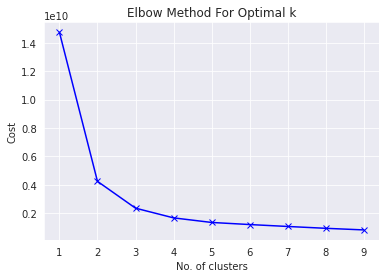

In [56]:
distance = []
values = range(1,10)
for k in values:
    kproti = KPrototypes(n_clusters=k)
    kproti.fit(data_arr, categorical=[1,3,5,6,7,8,9,10,11,12,13,14,15,16])
    distance.append(kproti.cost_) #running this took 20 mins

plt.plot(values, distance, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
kprot = KPrototypes(n_clusters=2, verbose=0)
kprot_clusters = kprot.fit_predict(data_arr, categorical=[1,3,5,6,7,8,9,10,11,12,13,14,15,16])

In [40]:
print(kprot.cluster_centroids_)

[[3.54406913e+01 9.31971720e+00 1.02760487e+03 3.36292223e+00
  7.09435504e+03 2.00000000e+00 3.00000000e+00 3.00000000e+00
  3.00000000e+00 1.00000000e+00 6.00000000e+00 3.00000000e+00
  1.00000000e+00 0.00000000e+00 3.00000000e+00 3.00000000e+00
  0.00000000e+00 2.00000000e+00 3.00000000e+00]
 [3.53386421e+01 9.62196144e+00 1.01077536e+03 3.78373847e+00
  2.96364821e+03 2.00000000e+00 3.00000000e+00 3.00000000e+00
  3.00000000e+00 1.00000000e+00 6.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 3.00000000e+00 3.00000000e+00
  0.00000000e+00 2.00000000e+00 3.00000000e+00]]


In [41]:
cluster_dict = []
for c in kprot_clusters:
  cluster_dict.append(c)

In [42]:
actual_attrition = data_df["attrition"].values
correct = 0
for i in range(len(actual_attrition)):
  if actual_attrition[i] == cluster_dict[i]:
    correct = correct + 1
print(correct)

1194


# KModes Clustering

## KMode Elbow Plot

In [43]:
!pip install kmodes

In [44]:
from kmodes.kmodes import KModes

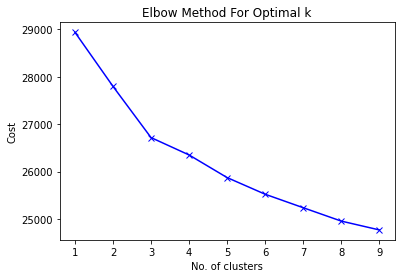

In [45]:
distance = []
values = range(1,10)
for k in values:
    kmodes = KModes(n_clusters=k)
    kmodes.fit(trimmed_data_df)
    distance.append(kmodes.cost_)

plt.plot(values, distance, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## Exploring 3-Modes

In [46]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", verbose=1, random_state=42) 
clusters = kmode.fit_predict(trimmed_data_df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 780, cost: 27010.0
Run 1, iteration: 2/100, moves: 1, cost: 27010.0


array([0, 2, 1, ..., 2, 0, 0], dtype=uint16)

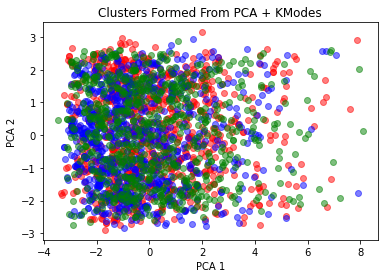

In [47]:
filtered_0 = PCA_components[clusters==0] 
filtered_1 = PCA_components[clusters==1]
filtered_2 = PCA_components[clusters==2]
plt.scatter(filtered_0[0], filtered_0[1], color="red", alpha=0.5)
plt.scatter(filtered_1[0], filtered_1[1], color="blue", alpha=0.5)
plt.scatter(filtered_2[0], filtered_2[1], color="green", alpha=0.5)
plt.title("Clusters Formed From PCA + KModes")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Cleaning for Visuals

In [48]:
temp_df = trimmed_data_df.copy()
temp_df["3_clusters"] = clusters
temp_df.head()

,age,business_travel,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,rate_avg,3_clusters
0,41,2,1,2,1,2,3,2,7,4,2,1,3,1,0,0,1,4,6891.67,0
1,49,1,8,1,2,3,2,2,6,2,1,0,4,4,1,3,3,7,8415.67,2
2,37,2,2,2,4,4,2,1,2,3,2,1,3,2,0,3,3,0,1287.00,1
3,33,1,3,4,5,4,3,1,6,3,1,1,3,3,0,3,3,7,8202.33,0
4,27,2,2,1,7,1,3,1,2,2,1,0,3,4,1,3,3,2,5754.33,2


In [49]:
temp_df["3_clusters"].value_counts()

0    908
1    826
2    732
Name: 3_clusters, dtype: int64

## Age Among Clusters

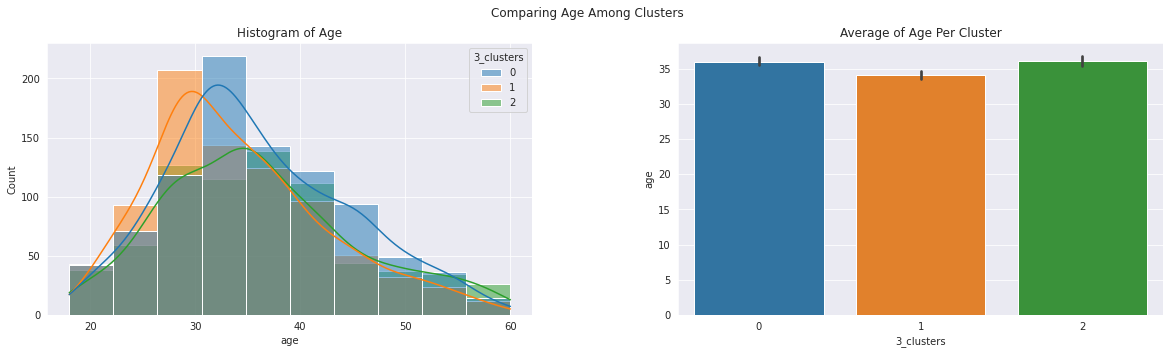

In [50]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.histplot(x="age", data=temp_df, hue="3_clusters", palette="tab10", kde=True, bins=10, ax=axs[0])
sns.barplot(x="3_clusters", y="age", data=temp_df, ax=axs[1])
fig.suptitle("Comparing Age Among Clusters")
axs[0].set_title("Histogram of Age")
axs[1].set_title("Average of Age Per Cluster")
plt.subplots_adjust(wspace=0.3)
fig.show()

## Rate_Avg Among Clusters

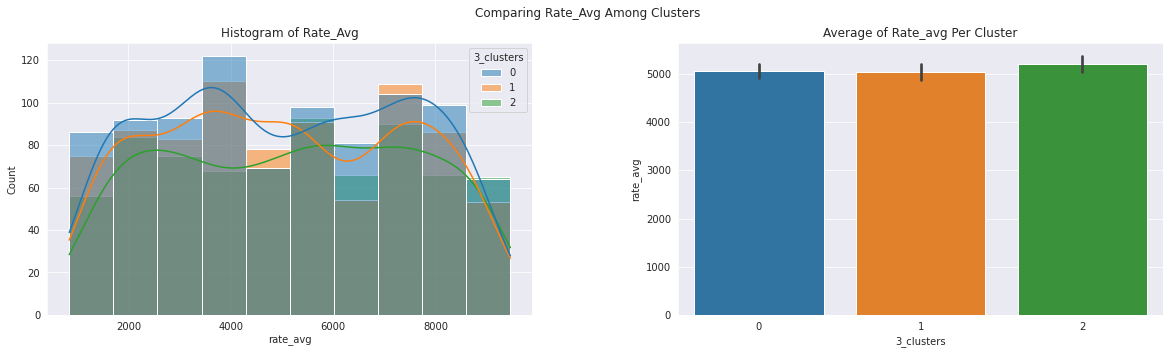

In [51]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.histplot(x="rate_avg", data=temp_df, hue="3_clusters", palette="tab10", kde=True, bins=10, ax=axs[0])
sns.barplot(x="3_clusters", y="rate_avg", data=temp_df, ax=axs[1])
fig.suptitle("Comparing Rate_Avg Among Clusters")
axs[0].set_title("Histogram of Rate_Avg")
axs[1].set_title("Average of Rate_avg Per Cluster")
plt.subplots_adjust(wspace=0.3)
fig.show()

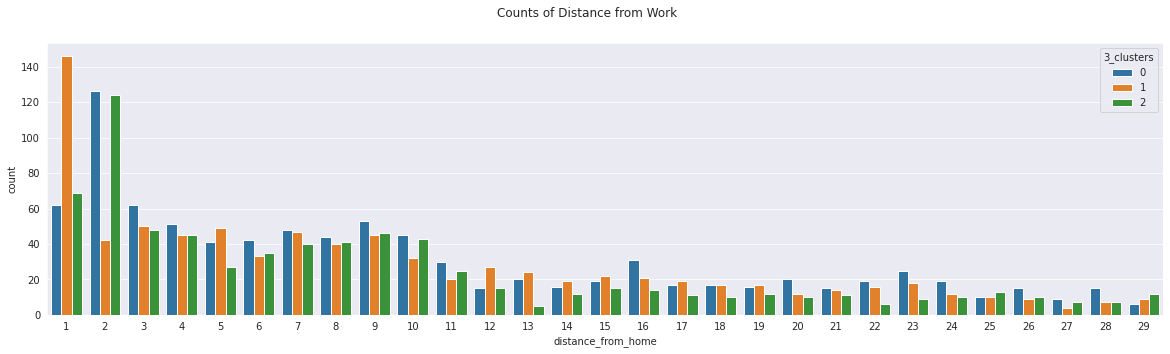

In [52]:
fig, axs = plt.subplots(1,1, figsize=(20,5))
sns.countplot(x="distance_from_home", data=temp_df, hue="3_clusters", 
            palette="tab10")
fig.suptitle("Counts of Distance from Work")
fig.show()